## 教師あり学習(Supervised Learning)

* 分類(classification) 
* 二クラス分類(binary classification) ex:email that whether spam or not. There two class, or positive and negative.

*　多クラス分類(multiclass classification)                        

* 回帰（regression）

## 汎化・過剰適合・適合不足(generalize・overfitti・underfitting)

* 汎化：モデルが未知のデータに対して正確な予想ができることを指す
* 過剰適合：訓練データの要素が複雑すぎて未知のデータに対して意味をなさなくなってしまうこと（訓練データには適応できるがテストデータに対して対応できないこと）
* 適合不足：訓練データにすら対応出来ないほど単純なデータになっていること。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

## mglearn

* 人工データ（アルゴリズムの特定の側面を強調するように設計された）
* 実データ

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


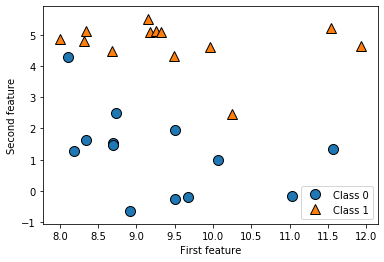

In [2]:
X, y = mglearn.datasets.make_forge()#forge:binary classification
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

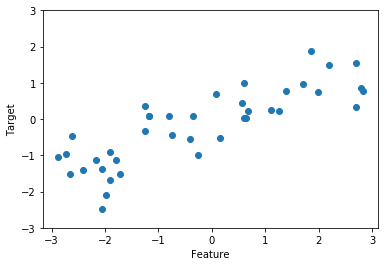

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)#wave:regression
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key:\n{}".format(cancer.keys()))

cancer.key:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [6]:
print("Summation per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
#bincount: count mode

Summation per class:
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


## k-最近傍法

* 訓練データセットの中から最も近い点（最近傍点）を見つける
* それぞれのクラスに対して近傍点がいくつあるか数えて、最も多いクラスを予測値とする

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


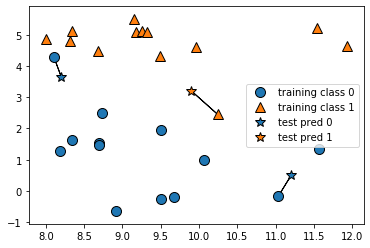

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


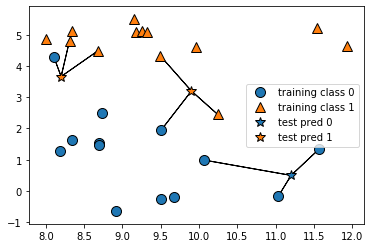

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


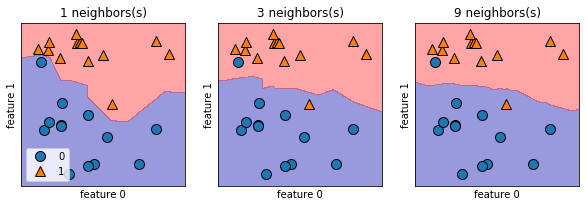

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

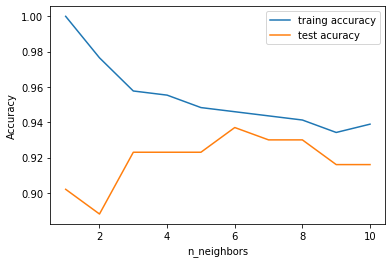

In [25]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)

for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label = "traing accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "test acuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

* 訓練データは1回目だけ考慮すると精度はいいが最近傍点が多くなると精度が悪くなっている。
* テストデータは6回目をピークに平になっている。

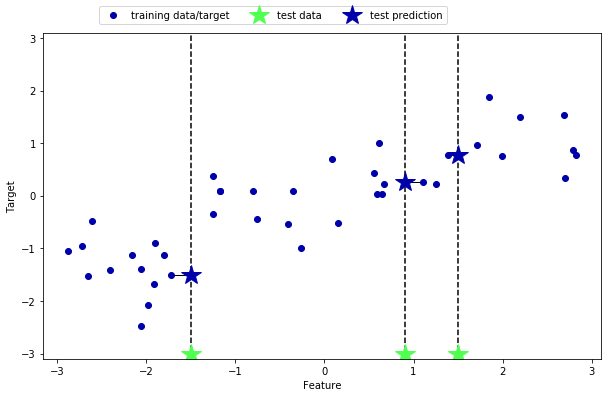

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

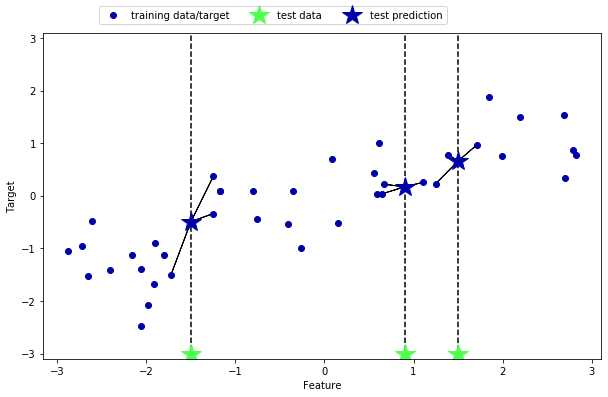

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [29]:
from sklearn.neighbors import KNeighborsRegressor#回帰のためのk-最近傍点アルゴリズムのインポート

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#3つの最近傍点を考慮するように設定してモデルのインスタンス化
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [30]:
print("Test set predicitons:\n{}".format(reg.predict(X_test)))

Test set predicitons:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [34]:
print("Test set R^2:{:.2f}".format(reg.score(X_test, y_test)))#R^2は決定係数を示していて、回帰モデルの正確さを測る指標（0から１の値をとり１になるほど精度が良い）

Test set R^2:0.83


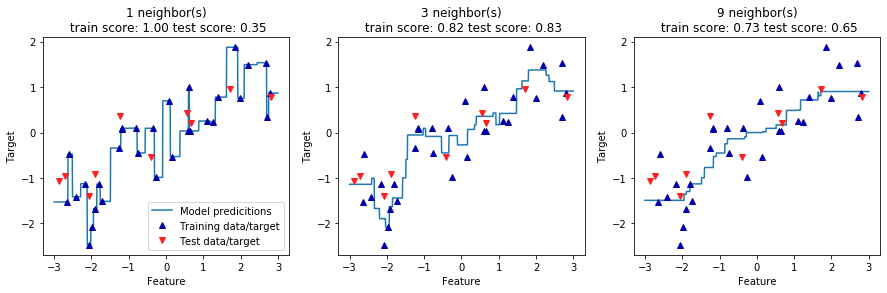

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0))
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1))
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
                                                                    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predicitions", "Training data/target", "Test data/target"], loc = "best")

* 一個目は訓練データに対してはかなり精度がいいが、予測が不安定になっている
* 最近傍点がふえるんつれて予測はスムーズになるが、訓練データに対する適合度が下がる

### KNeighborsの利点と欠点

* 近傍点の数は三個から五個位で良い
* モデル容易に理解できる
* 訓練データが多くなると予測が遅くなる
* 特徴量が多すぎるとうまく機能しなくなる
* 特徴量が０の場合（sparse data）では特に性能が悪い

→アルゴリズム理解しやすいが処理速度が遅く多数の特徴量を扱うことができない。